# Pedro - Visualization of Short Squeezes

In [24]:
# Imports
import pandas as pd
import yfinance as yf
from pathlib import Path
import matplotlib.pyplot as plt

In [25]:
# Read in ShortSqueezeData.csv
merged_df = pd.read_csv(
    Path("Resources/ShortSqueezeData.csv"),
    parse_dates=True,
    infer_datetime_format=True)

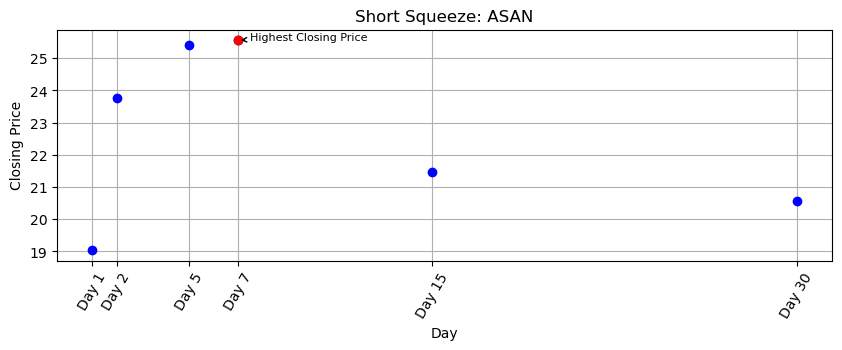

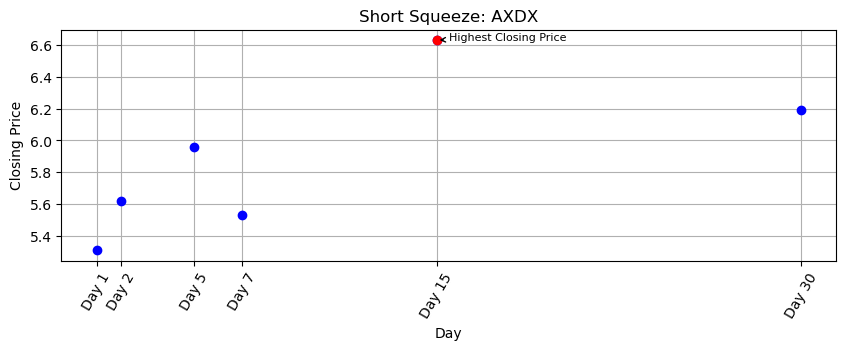

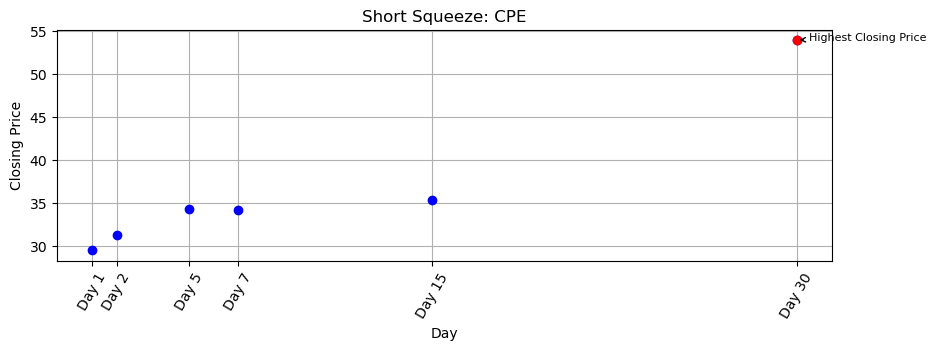

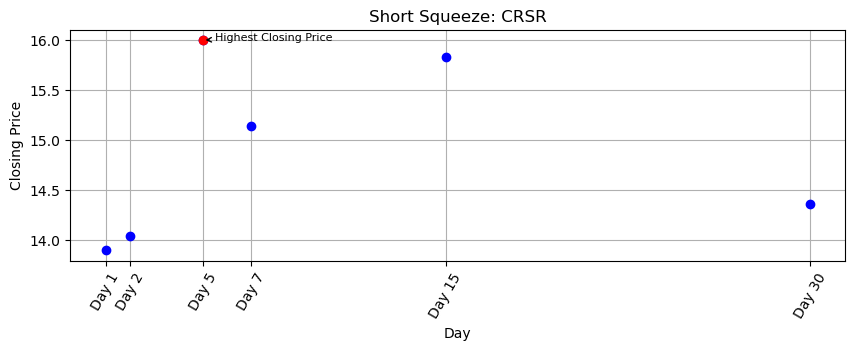

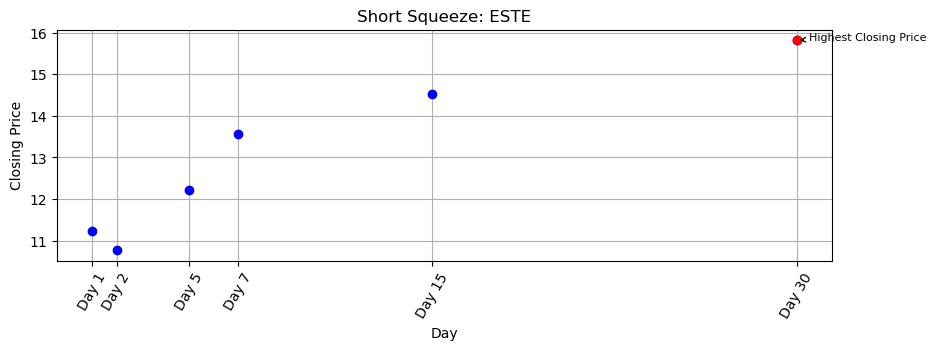

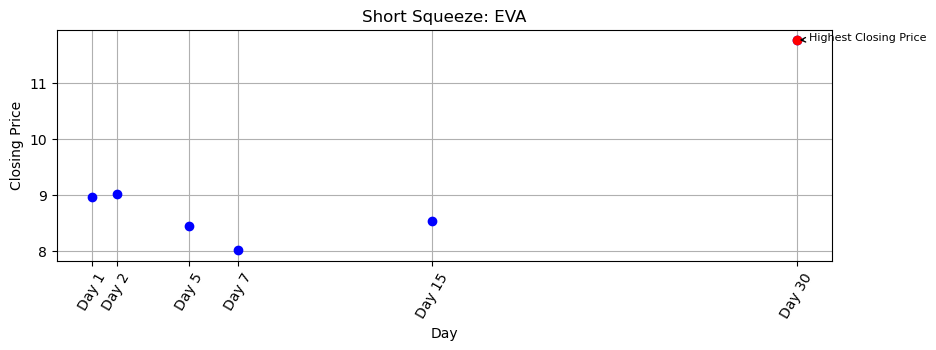

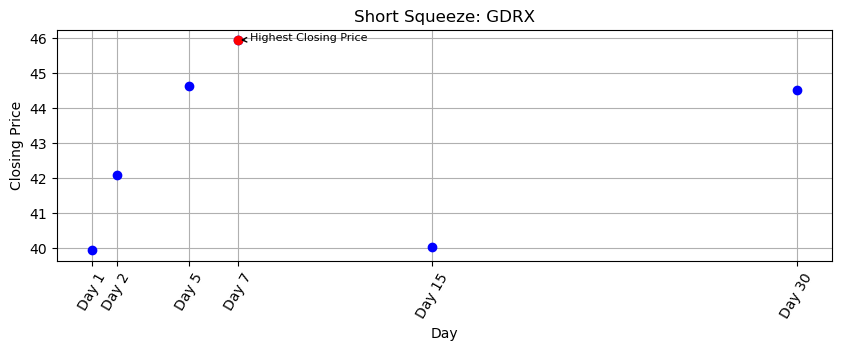

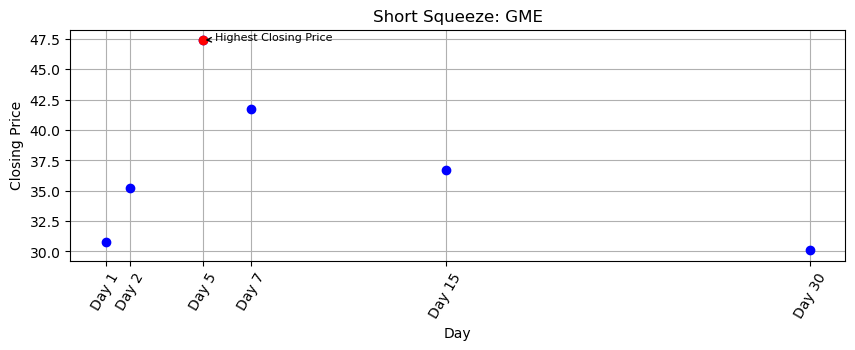

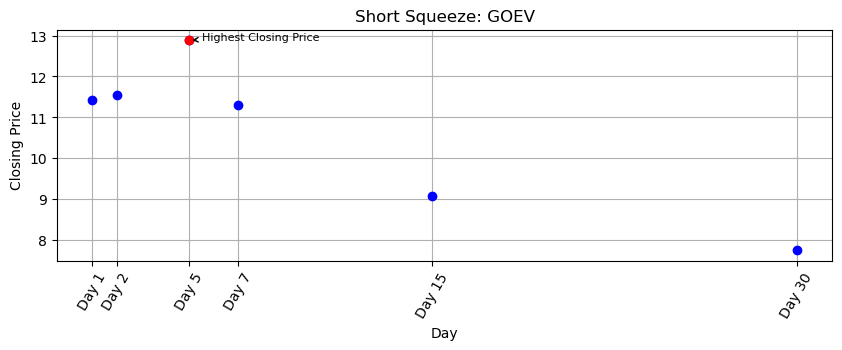

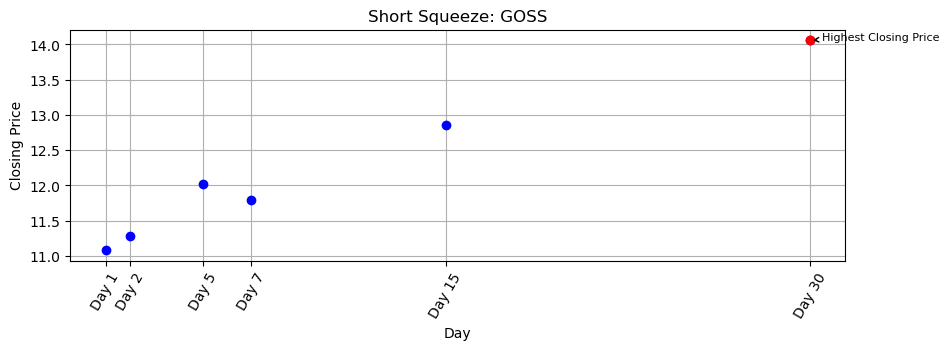

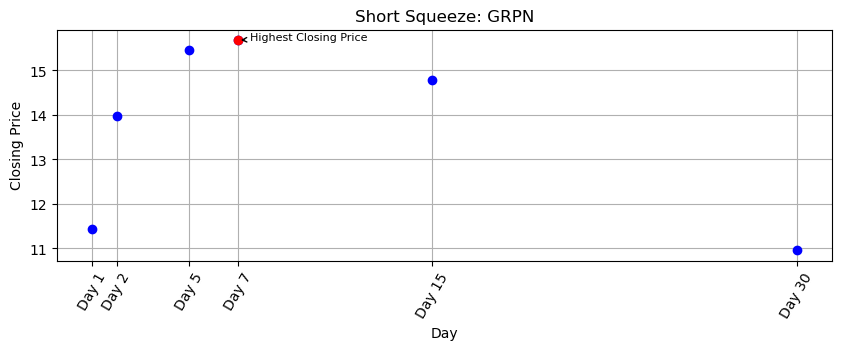

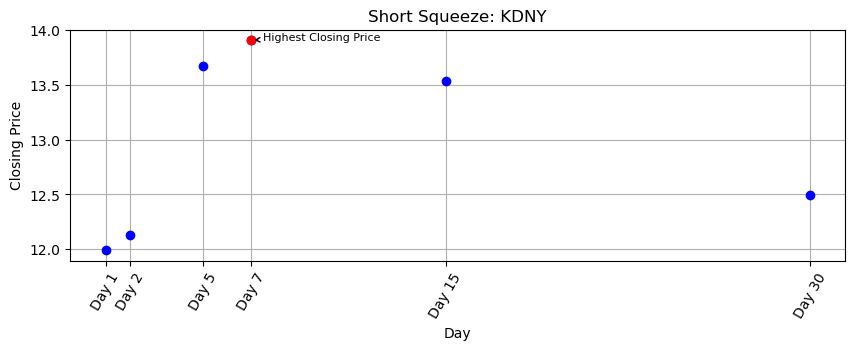

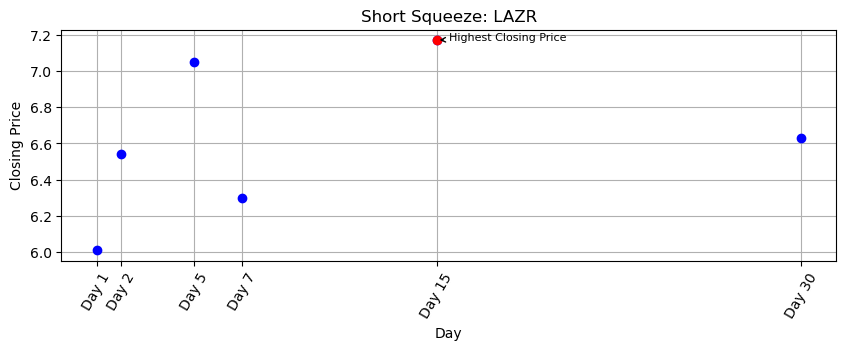

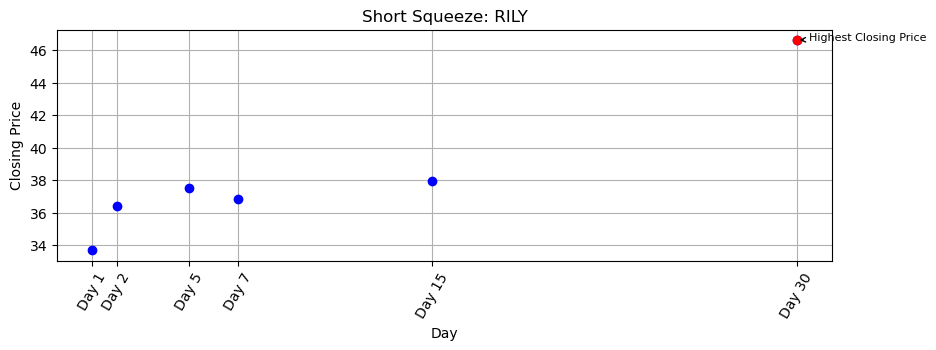

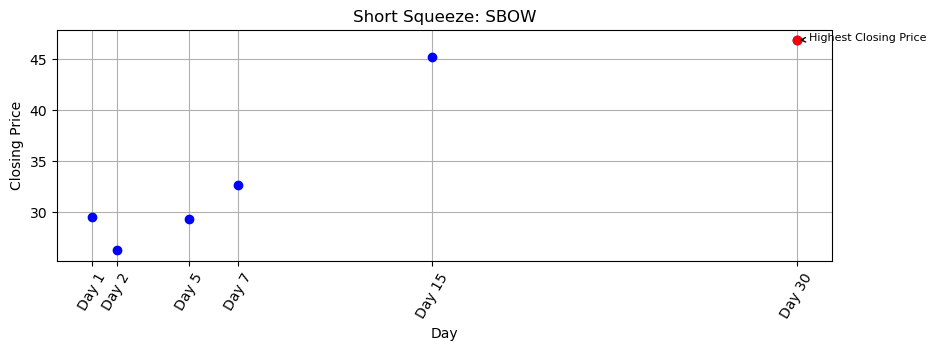

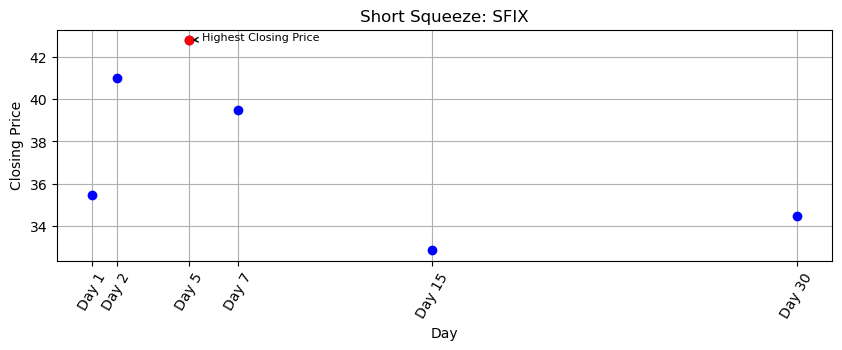

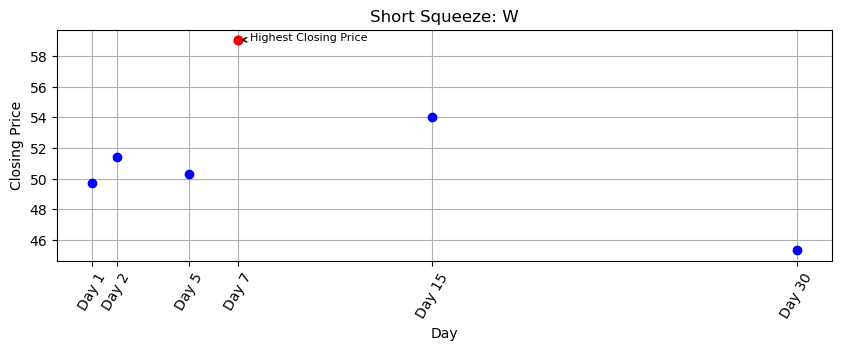

In [26]:
# Visualizing Short Squeeze
Desired_Days = [1, 2, 5, 7, 15, 30]
short_squeeze_df = merged_df[merged_df['Short Squeeze'] == 1]
grouped_df = short_squeeze_df.groupby('Symbol')
for symbol, data in grouped_df:
    data = data.sort_values('Date')
    plt.figure(figsize=(10, 3))
    days_to_plot = Desired_Days
    closing_prices = [data[f'Close Price Day {day}'].iloc[-1] for day in days_to_plot]
    plt.plot(days_to_plot, closing_prices, 'o', color='blue')
    highest_closing_price = max(closing_prices)
    highest_closing_price_day = days_to_plot[closing_prices.index(highest_closing_price)]
    plt.plot(highest_closing_price_day, highest_closing_price, 'ro')
    plt.annotate('Highest Closing Price',
                 xy=(highest_closing_price_day, highest_closing_price),
                 xytext=(highest_closing_price_day + 0.5, highest_closing_price),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=8,
                 ha='left')
    plt.xlabel('Day')
    plt.ylabel('Closing Price')
    plt.title(f'Short Squeeze: {symbol}')
    plt.xticks(days_to_plot, [f'Day {day}' for day in days_to_plot], rotation=60)
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


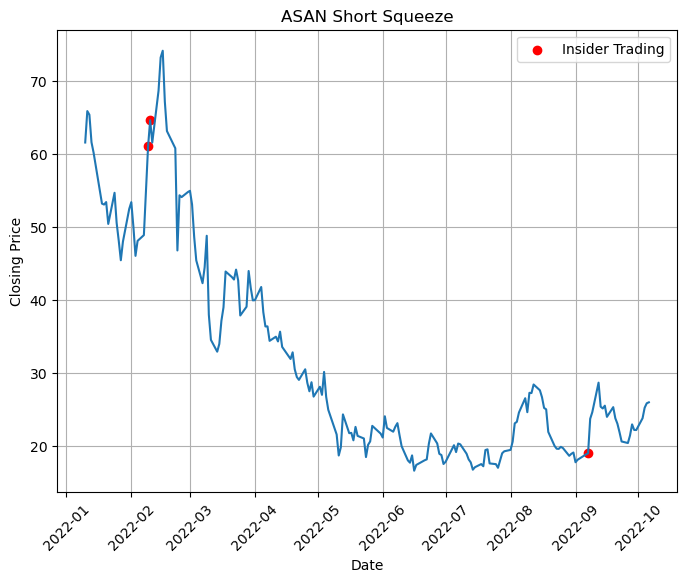

[*********************100%***********************]  1 of 1 completed


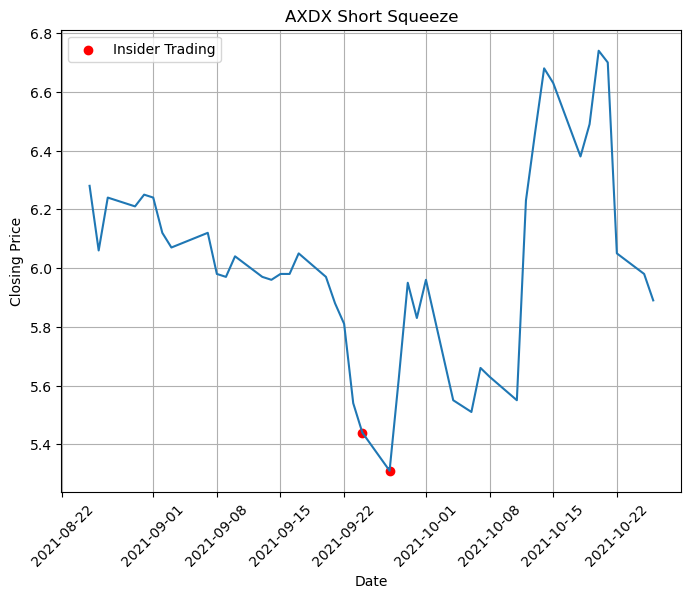

[*********************100%***********************]  1 of 1 completed


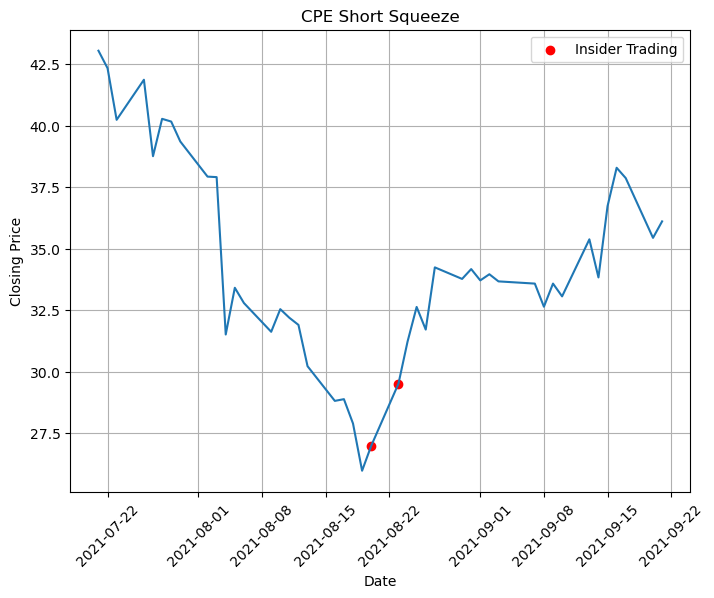

[*********************100%***********************]  1 of 1 completed


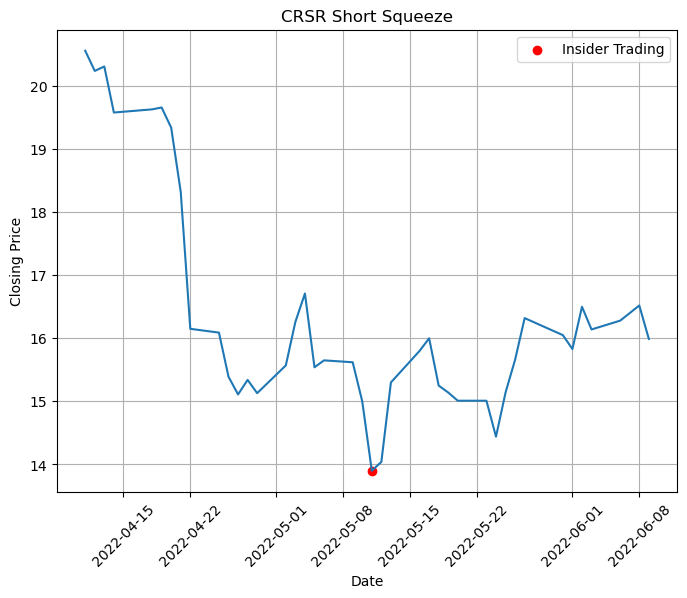

[*********************100%***********************]  1 of 1 completed


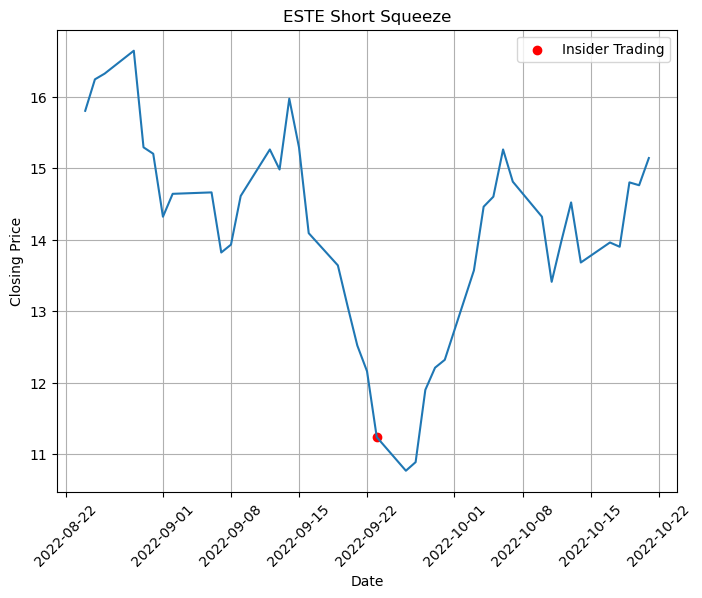

[*********************100%***********************]  1 of 1 completed


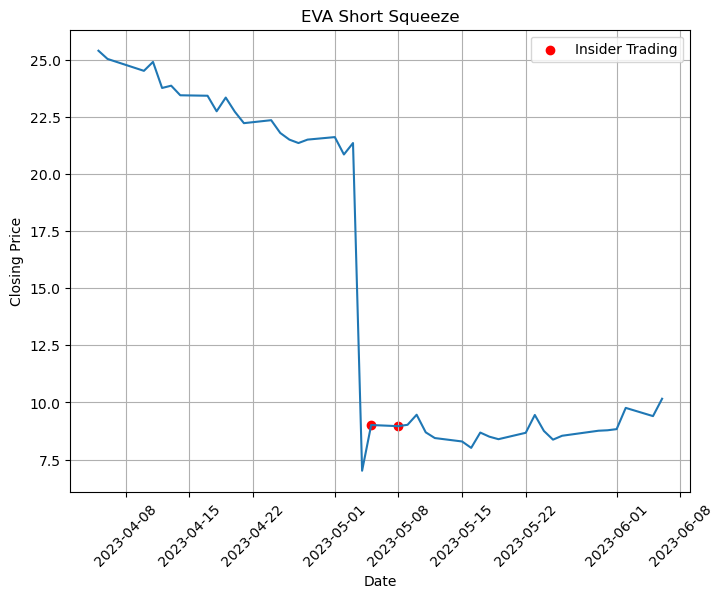

[*********************100%***********************]  1 of 1 completed


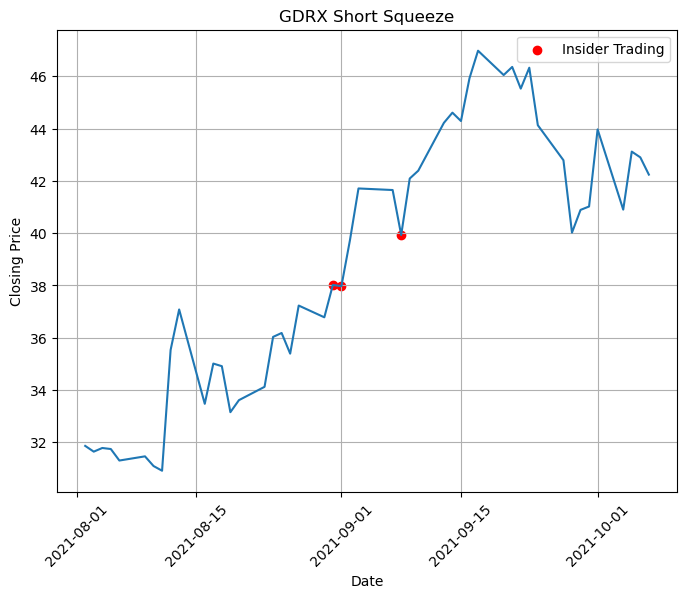

[*********************100%***********************]  1 of 1 completed


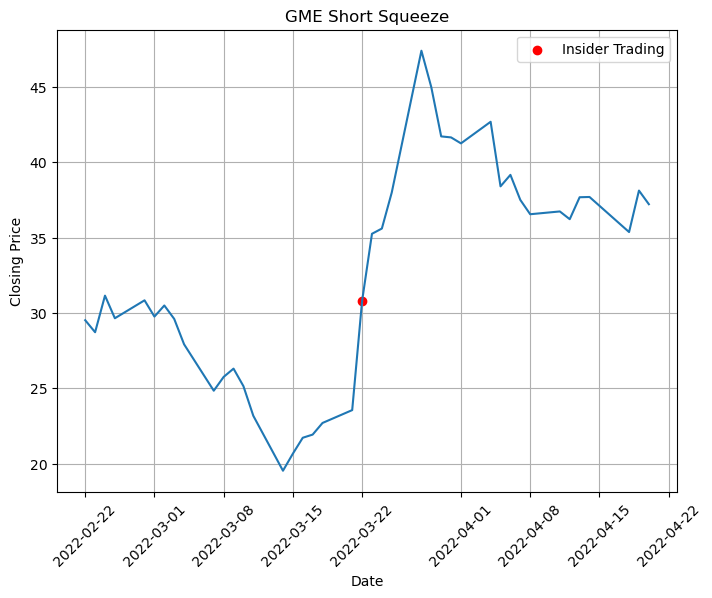

[*********************100%***********************]  1 of 1 completed


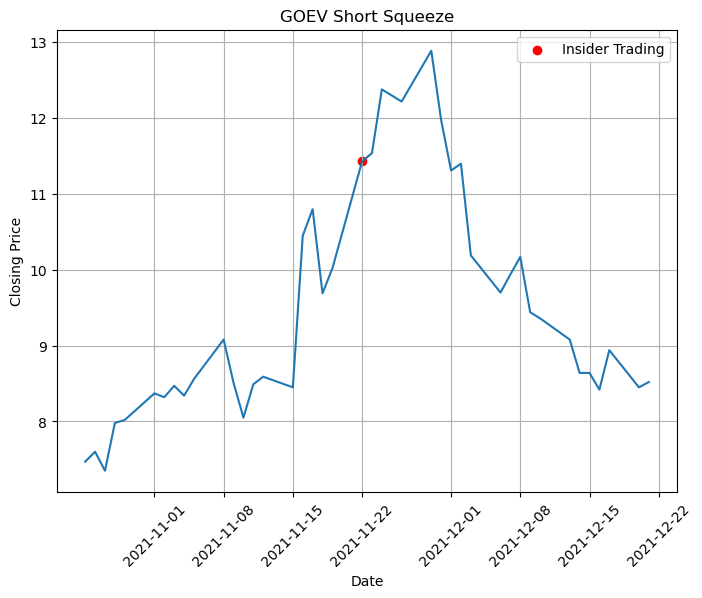

[*********************100%***********************]  1 of 1 completed


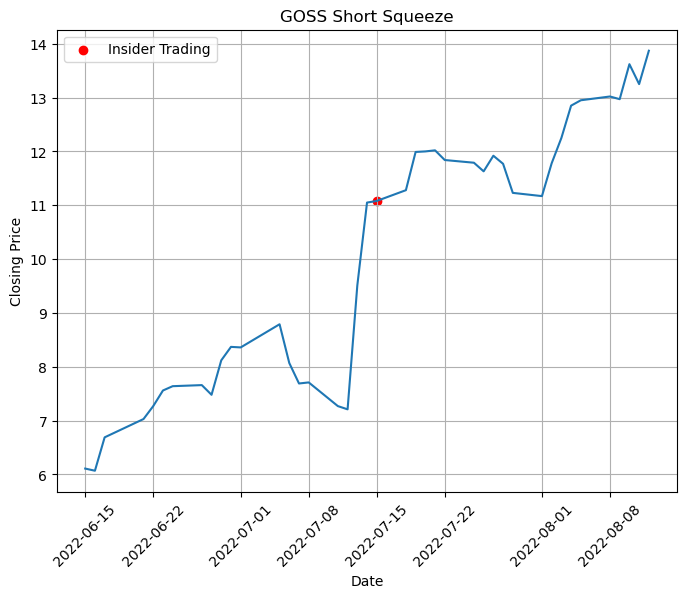

[*********************100%***********************]  1 of 1 completed


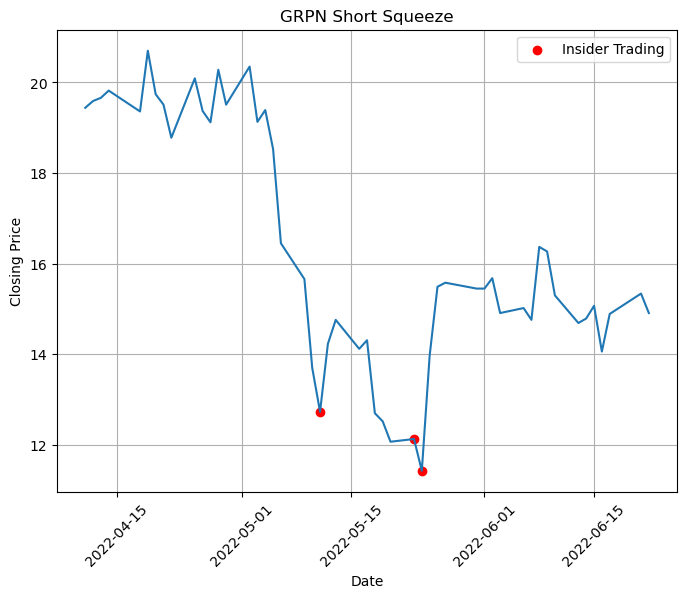

[*********************100%***********************]  1 of 1 completed


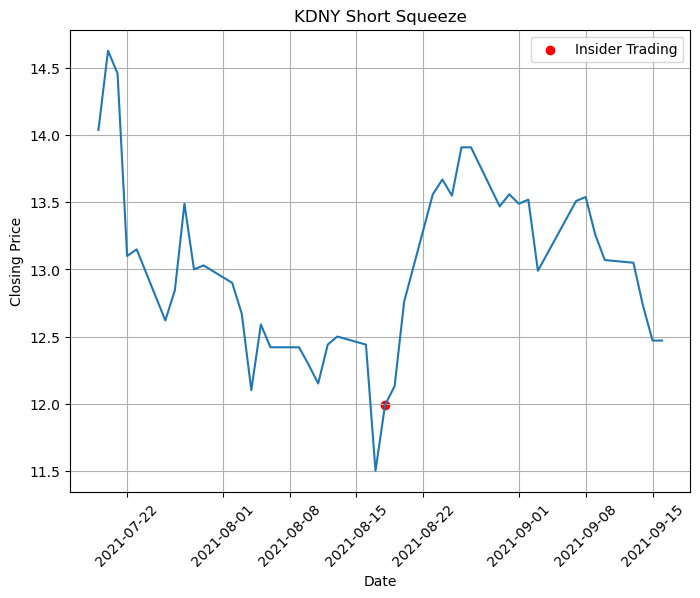

[*********************100%***********************]  1 of 1 completed


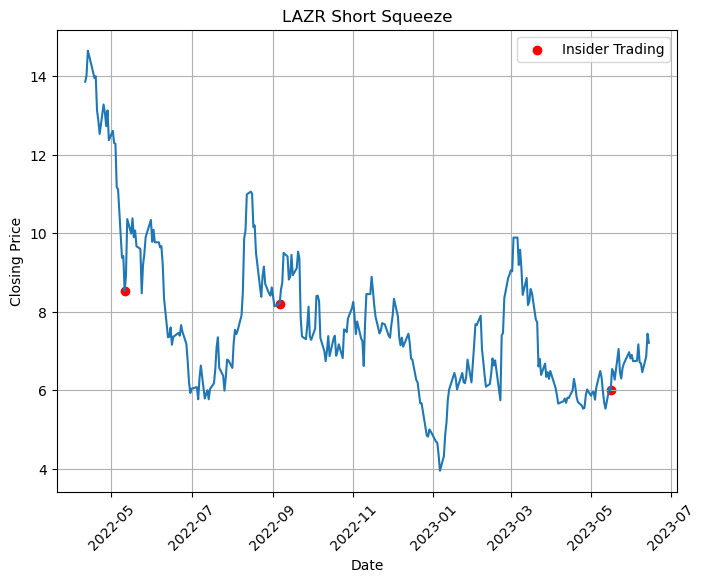

[*********************100%***********************]  1 of 1 completed


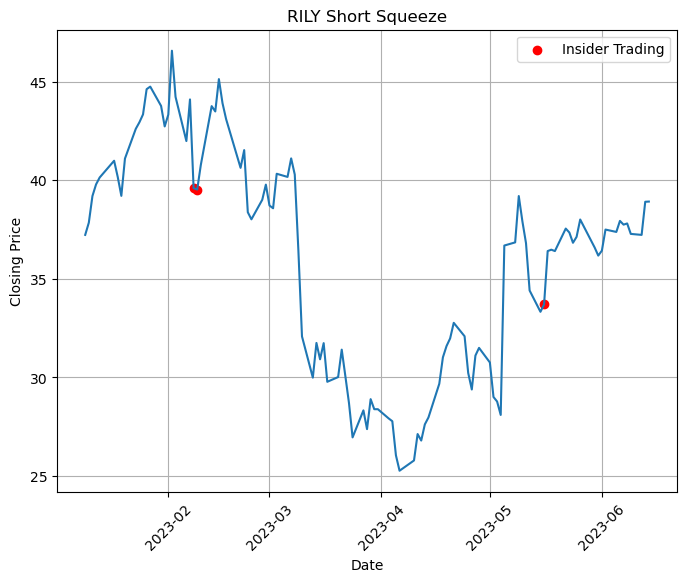

[*********************100%***********************]  1 of 1 completed


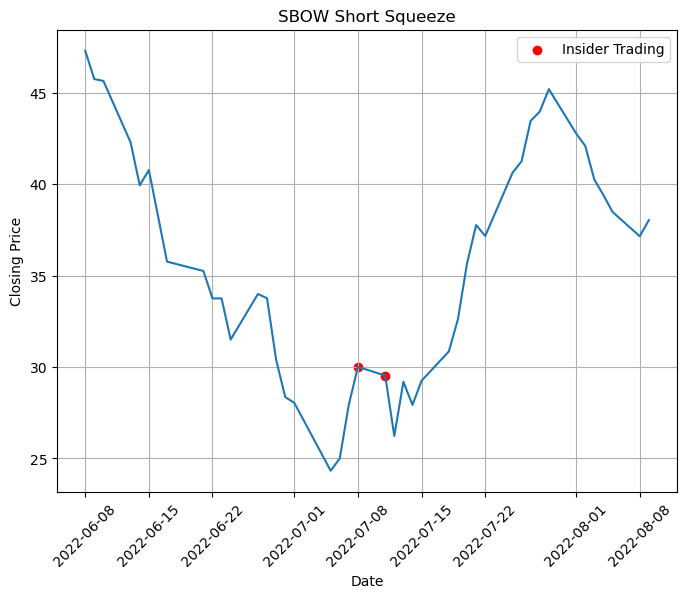

[*********************100%***********************]  1 of 1 completed


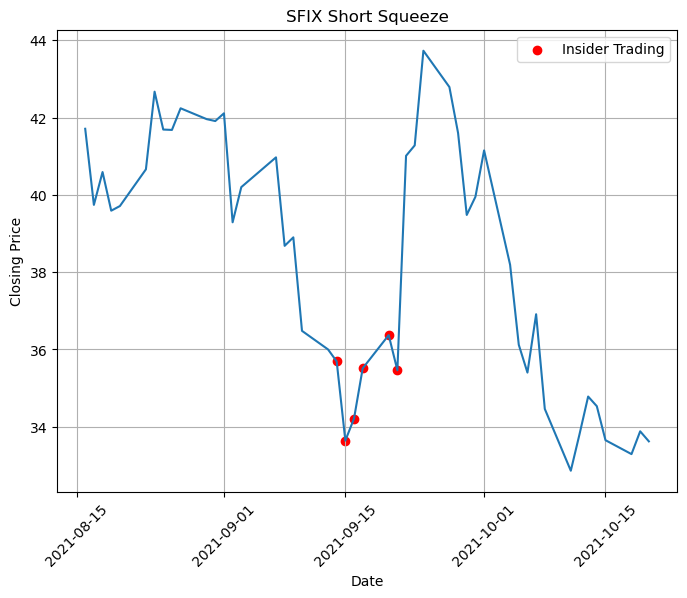

[*********************100%***********************]  1 of 1 completed


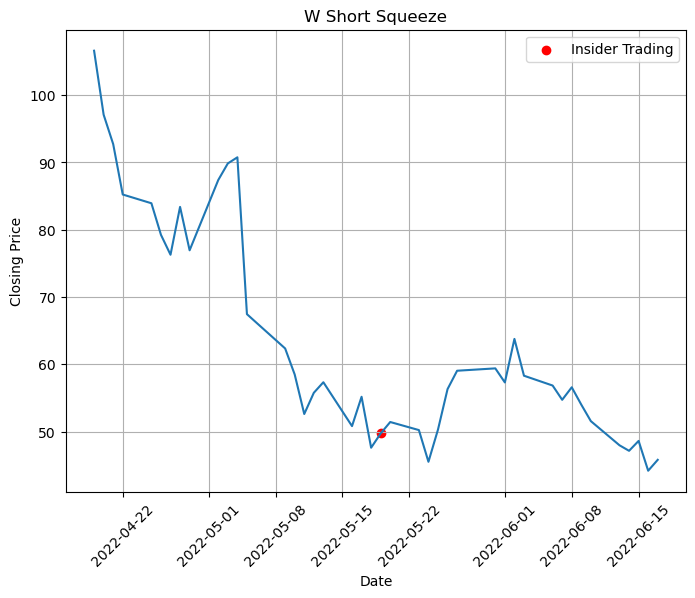

In [23]:
# Looking at each short squeeze company 30 days before and after Insider Trading activity occurs
for symbol, data in grouped_df:
    start_date = pd.to_datetime(data['Date'].min()) - pd.DateOffset(days=30)
    end_date = pd.to_datetime(data['Date'].max()) + pd.DateOffset(days=30)
    yf_data = yf.download(symbol, start=start_date, end=end_date)
    close_prices = yf_data['Close']
    insider_trading_date = pd.to_datetime(data['Date'])
    plt.figure(figsize=(8, 6))
    plt.plot(close_prices.index, close_prices.values)
    plt.scatter(insider_trading_date, close_prices.loc[insider_trading_date], color='red', label='Insider Trading')
    plt.title(f'{symbol} Short Squeeze')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()